# Image processing con Python


http://www.slideshare.net/zblair/opencv-introduction

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

%matplotlib inline

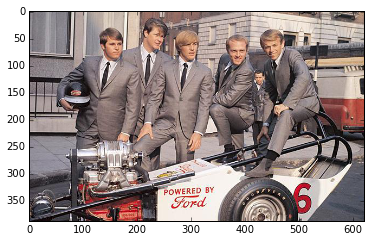

In [3]:
# Cargar imagenes
beach = cv2.imread("public-images/beachboys.jpg")[:,:,::-1]
plt.imshow(beach)

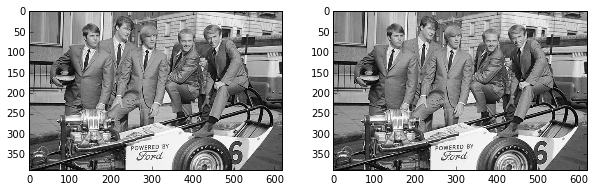

In [6]:
## cargar imagen como grayscale
beach_gray = cv2.imread("public-images/beachboys.jpg", cv2.IMREAD_GRAYSCALE)

## O ahora convertirlo.
beach_gray_converted = cv2.cvtColor(beach, cv2.COLOR_RGB2GRAY)

## pequeñas diferencias
fig, axes = plt.subplots(1, 2, figsize = (10, 5))
axes[0].imshow(beach_gray, cmap = plt.cm.gray)
axes[1].imshow(beach_gray_converted, cmap = plt.cm.gray)

In [8]:
drawing on images

SyntaxError: invalid syntax (<ipython-input-8-e4c303d67cdc>, line 1)

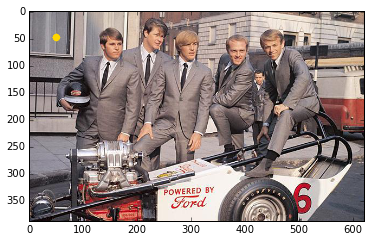

In [10]:
sunny_beach = beach.copy()
cv2.circle(sunny_beach, (50, 50), 7, color = (255, 215, 0), thickness = -1, )
plt.imshow(sunny_beach)
#notese que tuvimos que hacer una copia antes de hacer el dibujo.

In [12]:
abeach = cv2.circle(beach, (50, 50), 7, color = (255, 215, 0), thickness = -1, )
plt.imshow(abeach)

TypeError: Layout of the output array img is incompatible with cv::Mat (step[ndims-1] != elemsize or step[1] != elemsize*nchannels)

### Pading a Imagenes

(<matplotlib.axes._subplots.AxesSubplot at 0x10ed98b10>,
 <matplotlib.text.Text at 0x10edd44d0>)

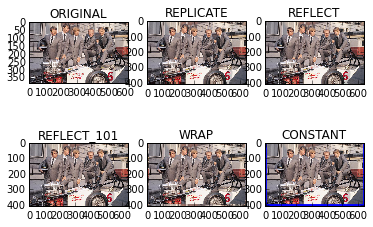

In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

BLUE = (0,0,255)

img1 = beach ## no need to explicitly copy

replicate = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)

plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')

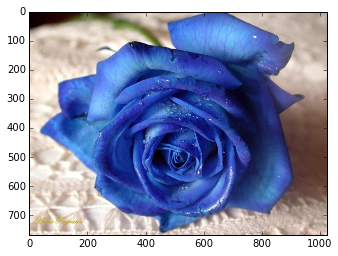

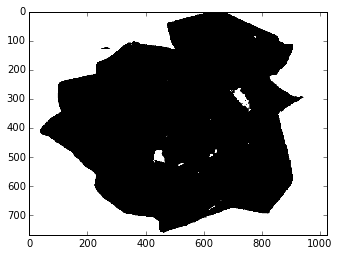

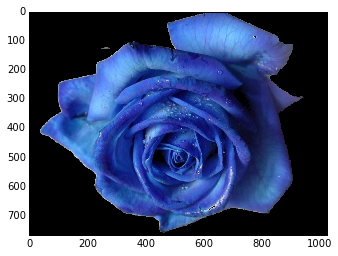

In [15]:
# Podemos usar los colores a nuestro favor, para remover backgrounds 
# Y delimitar objetos.
rose = cv2.imread("public-images/blue_rose.jpg")
plt.imshow(rose[:,:,::-1])

rose_hsv = cv2.cvtColor(rose, cv2.COLOR_BGR2HSV)
lower_blue = (60, 30, 30)
upper_blue = (130, 255, 255) # Hue (0 to 179), Saturation (0 to 255), Value (0 to 255)
mask = cv2.inRange(rose_hsv, lower_blue, upper_blue)
plt.figure()
plt.imshow(mask, cmap = plt.cm.binary)

masked_rose = cv2.bitwise_and(rose, rose, mask = mask)
plt.figure()
plt.imshow(masked_rose[:,:,::-1])

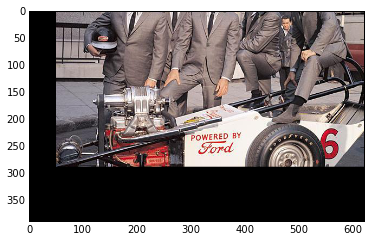

In [18]:
#Otras transformaciones de imagenes:
#translación
beach = cv2.imread("public-images/beachboys.jpg")[:,:,::-1]
translated_beach = cv2.warpAffine(beach, np.array([[1, 0, 50], [0., 1., -100]]), (beach.shape[1], beach.shape[0]))
plt.imshow(translated_beach)

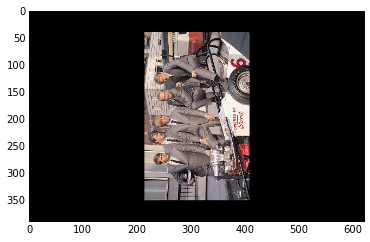

In [19]:
## rotación 
H, W = beach.shape[:-1]
rot_mat = cv2.getRotationMatrix2D((W/2, H/2), 90, 0.5)
rotated_beach = cv2.warpAffine(beach, rot_mat, (W, H))
plt.imshow(rotated_beach)

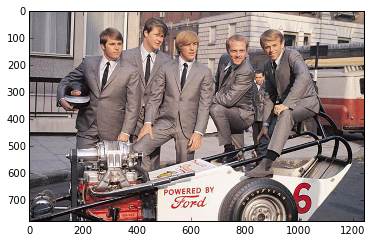

In [20]:
## cambiar de tamaño
H, W = beach.shape[:-1]
resized_beach = cv2.resize(beach, (W*2, H*2))
plt.imshow(resized_beach)

Ahora, viene una de las partes más interesantes de Open CV, las transformaciones:
- ** Affine Transformation ** : Las lineas paralelas en la imagen seguirán siendo paralelas, necesitamos tres puntos de la imagen y sus posiciones en la imagen de salida.
- **Perspective Transformation **:  Para la transformación de perspectiva, necesitas una matriz de 3x3 que vienen de cuatro puntos de la imagen de entrada y sus puntos en la salida. Estos 4 puntos, 3 no deben de ser colineares. 

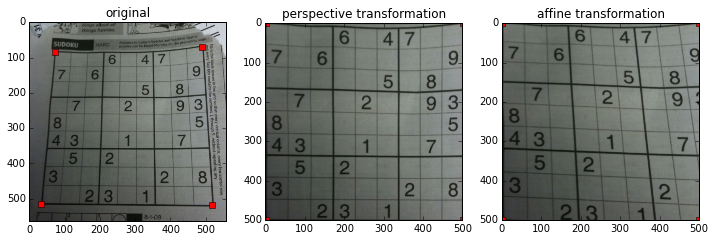

In [21]:
sudoku = cv2.imread("public-images/sudoku.jpg")[:,:,::-1]

## captured by GIMP - they must be float !!
original_xys = np.float32([[73, 85], [489, 69], [34, 514], [519, 518]])
mapped_xys = np.float32([[0, 0], [500, 0], [0, 500], [500, 500]])

## use perspective transformation
M = cv2.getPerspectiveTransform(original_xys, mapped_xys)
perspective_trans = cv2.warpPerspective(sudoku, M, (500, 500))

## use affine transformation
M = cv2.getAffineTransform(original_xys[:-1, :], mapped_xys[:-1, :])
affine_trans = cv2.warpAffine(sudoku, M, (500, 500))


fig, axes = plt.subplots(1, 3, figsize = (3 * 4, 4))
axes[0].imshow(sudoku)
axes[0].autoscale(False) ## SUPER USEFUL
axes[0].set_title("original")
axes[0].plot(original_xys[:, 0], original_xys[:, 1], "rs")


axes[1].imshow(perspective_trans)
axes[1].autoscale(False)
axes[1].plot(mapped_xys[:, 0], mapped_xys[:, 1], "rs")
axes[1].set_title("perspective transformation")

axes[2].imshow(affine_trans)
axes[2].autoscale(False)
axes[2].plot(mapped_xys[:, 0], mapped_xys[:, 1], "rs")
axes[2].set_title("affine transformation")

** Thresholding**: Permite la binarización de imagenes (Blanco y negro)

97.0


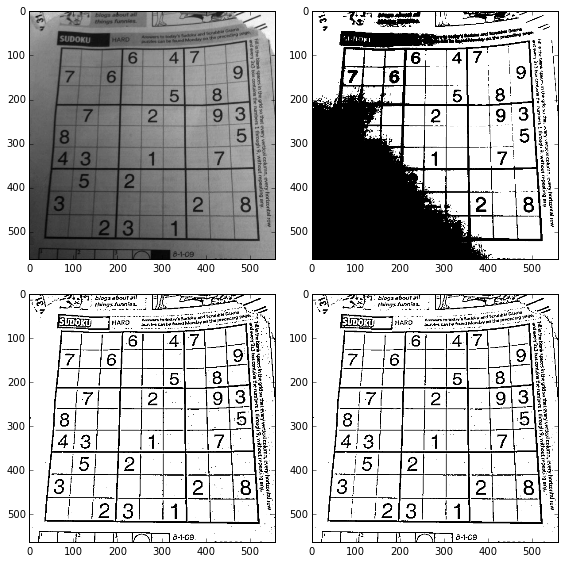

In [23]:
## cv2.threshold performs global thresholding 
## (a single value for whole image)
## cv2.adaptiveThreshold can be either mean-based or gaussian-based
## which uses different thersholding for different regions
sudoku_gray = cv2.cvtColor(sudoku, cv2.COLOR_RGB2GRAY)
thr, global_thres = cv2.threshold(sudoku_gray, 127, 255, 
                                  cv2.THRESH_OTSU)
print thr
adaptive_mean = cv2.adaptiveThreshold(sudoku_gray, 255, 
                        cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 
                        7, 6)
adaptive_gauss = cv2.adaptiveThreshold(sudoku_gray, 255,
                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,
                        11, 6)

fig, axes = plt.subplots(2, 2, figsize = (8, 8))
fig.tight_layout()

axes[0, 0].imshow(sudoku_gray, cmap = plt.cm.gray)
axes[0, 1].imshow(global_thres, cmap = plt.cm.gray)
axes[1, 0].imshow(adaptive_mean, cmap = plt.cm.gray)
axes[1, 1].imshow(adaptive_gauss, cmap = plt.cm.gray)

** Smoothing/Blurring **: Permite la remoción de ruido de las imagenes. 

<function __main__.show_bluring>

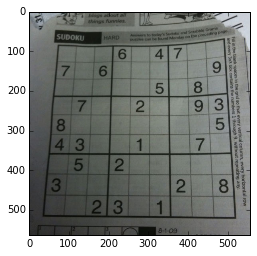

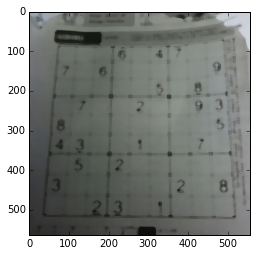

In [25]:
from IPython.html import widgets

def show_bluring(img, method_f, block_size):
    plt.imshow(sudoku)
    plt.figure()
    if method_f == cv2.blur:
        blur_img = cv2.blur(img, (block_size, block_size))
    elif method_f == cv2.GaussianBlur:
        blur_img = cv2.GaussianBlur(img, (block_size, block_size), 0)
    elif method_f == cv2.medianBlur:
        blur_img = cv2.medianBlur(img, block_size)
    else:
        raise ValueError("Unknown method")
    plt.imshow(blur_img)

methods = dict(zip(["blur", "gaussian", "median"], [cv2.blur, cv2.GaussianBlur, cv2.medianBlur]))
widgets.interact(show_bluring, img = widgets.fixed(sudoku), 
                 method_f = methods,
                 block_size = (1, 21, 2))

## Segmentación de Imagenes

Una gran aplicación de preprocesamiento de imagenes, antes de obtener features, es la segmentación: Ya que permiten separar las áreas de una imagen
Es posible segmentar las imagenes usando OpenCV, combinando varias tecnicas quitando ruido.
http://docs.opencv.org/2.4/doc/tutorials/imgproc/erosion_dilatation/erosion_dilatation.html

162.0


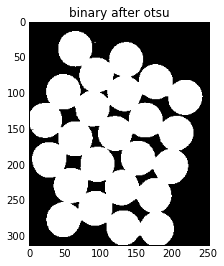

In [38]:
## step 1 - use otus binarization to segement image
thr, otsu_binary = cv2.threshold(gray_coins, 0, 255, 
                                 cv2.THRESH_OTSU+cv2.THRESH_BINARY_INV)
print thr
plt.imshow(otsu_binary, cmap = plt.cm.gray)
plt.title("binary after otsu")

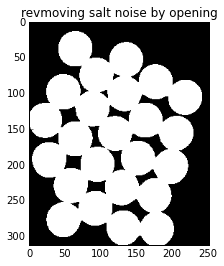

In [39]:
## step 2 - removing small salt noise by opening (erosion -> dialation)
## we don't see obvious holes (pepper noise), so need for closing
kernel = np.ones((3, 3), dtype=np.uint8)
opening = cv2.morphologyEx(otsu_binary, cv2.MORPH_OPEN, kernel, )
plt.figure()
plt.imshow(opening, cmap = plt.cm.gray)
plt.title("revmoving salt noise by opening")


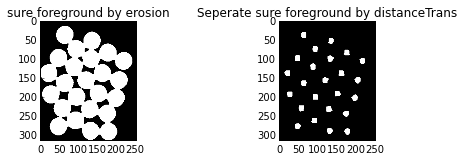

In [41]:
## step 3 - finding foreground with confidence
## ususally erosion will do the job, if the parts are not connected, OR FOREGROUND AS A WHOLE
## IS THE INTEREST
## so here a better opion is to find the distance transform and apply proper thr
sure_fg_erosion = cv2.erode(opening, kernel, )
plt.figure()
fig, axes = plt.subplots(1, 2)
fig.subplots_adjust(wspace = 1.5)
axes[0].imshow(sure_fg_erosion, cmap = plt.cm.gray)
axes[0].set_title("sure foreground by erosion")

sure_fg_dist = cv2.distanceTransform(opening, cv2.DIST_L2, 3)
thr, sure_fg_dist = cv2.threshold(sure_fg_dist, 0.7*sure_fg_dist.max(), 
                                 255, cv2.THRESH_BINARY)
sure_fg_dist = sure_fg_dist.astype(np.uint8)
axes[1].imshow(sure_fg_dist, cmap = plt.cm.gray)
axes[1].set_title("Seperate sure foreground by distanceTrans")

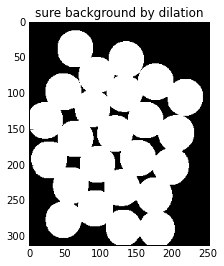

In [42]:
## step 4 - finding background with confidence
## a dialation will do the job
sure_bg_dilation = cv2.dilate(opening, np.ones((3, 3)))
plt.figure()
plt.imshow(sure_bg_dilation, cmap = plt.cm.gray)
plt.title("sure background by dilation")

uint8 uint8


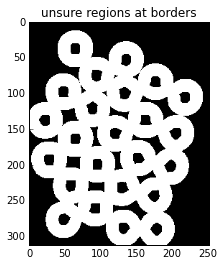

In [43]:
## step 5 - the remaining regioins are those we are NOT sure of.
## watershed is used to find them - these are usually regions at boundaries where
## foreground and background meet. 
## IF WE USE EROSION AS SURE-FOREGROUND, AND DIALATION AS SURE-BACKGROUND
## BORDERS ARE ESSENTIALLY MORPHLOGICAL_GRADIENT
print sure_bg_dilation.dtype, sure_fg_dist.dtype
unknown = cv2.subtract(sure_bg_dilation, sure_fg_dist, )
plt.figure()
plt.imshow(unknown, cmap = plt.cm.gray)
plt.title("unsure regions at borders")


<matplotlib.colorbar.Colorbar instance at 0x1127214d0>

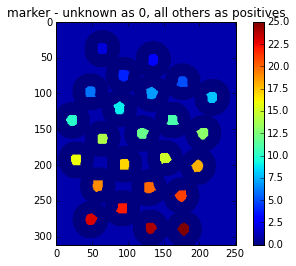

In [44]:
## step 6 - create marker img (int32, same size of original image)
## The regions we know for sure (whether foreground or background) are 
## labelled with any positive integers, but different integers, 
## and the area we don’t know for sure are just left as zero.
ret, markers = cv2.connectedComponents(sure_fg_dist, )
## make the background as 1, not 0 (for unknown)
markers = markers + 1
## mark any unknown as 0
markers[unknown==255] = 0
plt.figure()
plt.imshow(markers, cmap = plt.cm.jet)
plt.title("marker - unknown as 0, all others as positives")
plt.colorbar()

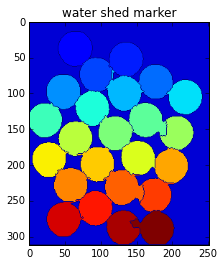

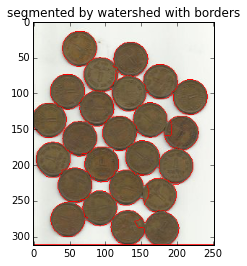

In [45]:
## step 7 - use watershed after getting markers
## watershed only needs the marker image, and will mark the border as -1
water_shed = cv2.watershed(coins, markers.copy())
plt.figure()
plt.imshow(water_shed)
plt.title("water shed marker")
segmented_coins = coins.copy()
segmented_coins[water_shed==-1] = (255, 0, 0)
plt.figure()
plt.imshow(segmented_coins)
plt.title("segmented by watershed with borders")

<matplotlib.colorbar.Colorbar instance at 0x112ab9560>

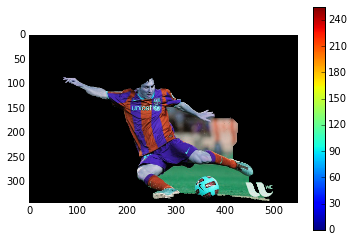

In [47]:
#https://cvg.ethz.ch/teaching/cvl/2012/grabcut-siggraph04.pdf
img = cv2.imread('public-images/messi5.jpg')
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (50,50,450,290)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

plt.imshow(img)
plt.colorbar()

## Gradientes de Imagenes

Son filtros que permiten encontrar edges en las imagenes

(<matplotlib.text.Text at 0x1147178d0>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

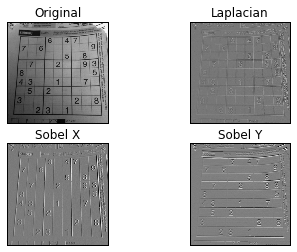

In [56]:

img = cv2.imread('public-images/sudoku.jpg',0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

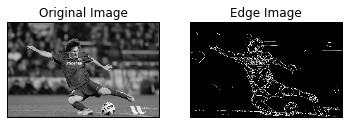

In [71]:
img = cv2.imread('public-images/messi5.jpg',0)
edges = cv2.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([]) 
plt.show()

## Encontrar contornos

Los contornos nos permiten encontrar objetos. De manera abstracta, pueden ser vistos como curvas que juntan una serie de puntos continuos.

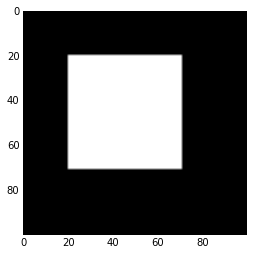

In [72]:
img = np.zeros((100, 100), dtype = np.uint8)
img = cv2.rectangle(img, (20, 20), (70, 70), 255, thickness = -1)
plt.imshow(img, cmap = plt.cm.gray)

In [73]:
ii, contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE, 
                                       cv2.CHAIN_APPROX_SIMPLE)

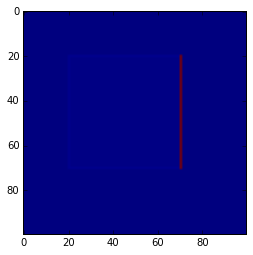

In [77]:
plt.imshow(ii)

In [75]:
print(contours)

[array([[[20, 20]],

       [[20, 70]],

       [[70, 70]],

       [[70, 20]]], dtype=int32)]


### Detección de esquinas.

Secciones con alta variación de intensidad. 

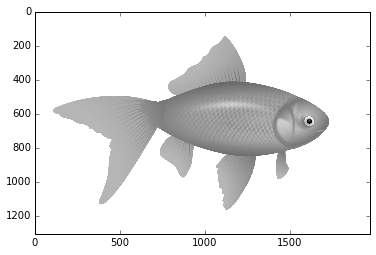

In [84]:
fish = cv2.imread("public-images/fish.png")[:,:,::-1]
gray_fish = cv2.cvtColor(fish, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_fish, cmap = plt.cm.gray)

In [95]:
#Harris
corners = cv2.cornerHarris(gray_sudoku, 2, 3, 0.0001)
corners = cv2.dilate(corners, np.ones((5, 5)))
corners = corners >= 0.0001*corners.max()
## dilatarla para que sea más visible

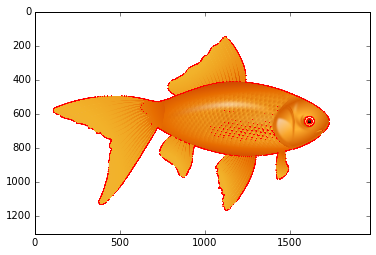

In [86]:
img =fish.copy()
img[corners] = (255, 0, 0)
plt.imshow(img)

In [94]:
len(corners)
corners[0]

array([[ 1233.,   414.]], dtype=float32)

<function __main__.plot_corner>

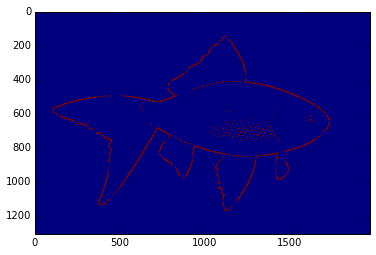

In [88]:
def plot_corner(k):
    corners = cv2.cornerHarris(gray_sudoku, 2, 3, k = 10**k)
    corners = cv2.dilate(corners, np.ones((5, 5)))
    corners = corners >= 0.0001*corners.max()
    plt.imshow(corners)
    
widgets.interact(plot_corner, k = (-5, 2, 0.1))

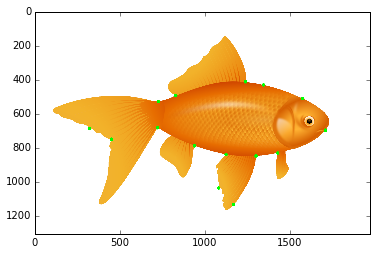

In [89]:
#Shi-Tomasi
corners = cv2.goodFeaturesToTrack(gray_sudoku, 15, 0.1, 100, )

img = sudoku.copy()

for c in corners[:,:,:]:
    x, y = map(int, c[0])
    img = cv2.circle(img, (x, y), 10, color = (0, 255, 0), thickness = -1)
    
plt.imshow(img)

In [90]:
corners

array([[[ 1233.,   414.]],

       [[ 1295.,   849.]],

       [[ 1422.,   832.]],

       [[  934.,   790.]],

       [[ 1119.,   841.]],

       [[  718.,   684.]],

       [[ 1702.,   698.]],

       [[  448.,   751.]],

       [[ 1076.,  1037.]],

       [[  824.,   495.]],

       [[  722.,   531.]],

       [[ 1339.,   433.]],

       [[ 1163.,  1134.]],

       [[  318.,   689.]],

       [[ 1568.,   512.]]], dtype=float32)

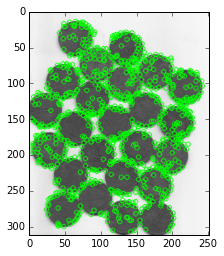

In [101]:
# Fast (Features from Accelerated Segment Test)
img = cv2.imread("public-images/coins.jpg")
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_img, cmap = plt.cm.gray)

fast = cv2.FastFeatureDetector_create()
kp = fast.detect(gray_img, None)
fast_img = cv2.drawKeypoints(gray_img, kp, None, color = (0, 255, 0), )
plt.imshow(fast_img)

Nota: La detección de features como estas, permite después el matching para encontrar objetos similares

http://docs.opencv.org/2.4/doc/tutorials/features2d/feature_flann_matcher/feature_flann_matcher.html

# Detección de Rostros por Haar Cascade

- Usa un clasificador basado en AdaBoost
- El Haar Cascade ayuda a no tener etapa de entrenamiento: http://coding-robin.de/2013/07/22/train-your-own-opencv-haar-classifier.html


In [103]:
!ls /usr/local/share/OpenCV/haarcascades/

haarcascade_eye.xml                        haarcascade_mcs_leftear.xml
haarcascade_eye_tree_eyeglasses.xml        haarcascade_mcs_lefteye.xml
haarcascade_frontalface_alt.xml            haarcascade_mcs_mouth.xml
haarcascade_frontalface_alt2.xml           haarcascade_mcs_nose.xml
haarcascade_frontalface_alt_tree.xml       haarcascade_mcs_rightear.xml
haarcascade_frontalface_default.xml        haarcascade_mcs_righteye.xml
haarcascade_fullbody.xml                   haarcascade_mcs_upperbody.xml
haarcascade_lefteye_2splits.xml            haarcascade_profileface.xml
haarcascade_licence_plate_rus_16stages.xml haarcascade_righteye_2splits.xml
haarcascade_lowerbody.xml                  haarcascade_russian_plate_number.xml
haarcascade_mcs_eyepair_big.xml            haarcascade_smile.xml
haarcascade_mcs_eyepair_small.xml          haarcascade_upperbody.xml


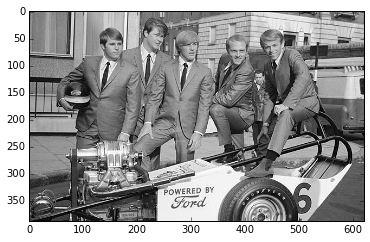

In [104]:
beachboys = cv2.imread("public-images/beachboys.jpg")[:,:,::-1]
gray = cv2.cvtColor(beachboys, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap = plt.cm.gray)

In [105]:
face_detector = cv2.CascadeClassifier('/usr/local/share/OpenCV/haarcascades/haarcascade_frontalface_alt2.xml')
faces = face_detector.detectMultiScale(gray, 1.02, 7)

In [106]:
faces

array([[365,  59,  41,  41],
       [280,  47,  41,  41],
       [141,  48,  39,  39],
       [220,  32,  39,  39],
       [413, 116,  22,  22],
       [428,  53,  38,  38]], dtype=int32)

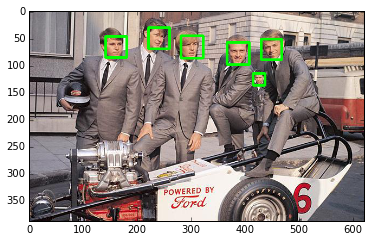

In [107]:
roi_img = beachboys.copy()
for face in faces:
    x, y, w, h = face
    roi_img = cv2.rectangle(roi_img, (x, y), (x+w, y+h), color = (0, 255, 0), thickness = 3)

plt.imshow(roi_img)

http://arnab.org/blog/so-i-suck-24-automating-card-games-using-opencv-and-python